<a href="https://colab.research.google.com/github/chananchida-srithongdee/introduction-to-data-analytics/blob/main/CLASS_CHURN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification on Customer Churn Dataset for the Data Analytics Session
> ## *Author* : [Rathachai CHAWUTHAI](https://rathachai.creatier.pro/) , Ph.D
> ### *Affiliation* : Computer Engineering, King Mongkut's Institute of Technology Ladkrabang (KMITL)
> #### *Updated Date* : 2022-04-16
---

> <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.



---

## 0) To load libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score



---



## 1) To load data and check

In [ ]:
churn = pd.read_csv('https://rathachai.github.io/DA101/data/customer-churn-data.csv')

In [ ]:
churn

Gender  Age Payment Method  LastTransaction  Churn
0      male   64    credit card               98  loyal
1      male   35         cheque              118  churn
2    female   25    credit card              107  loyal
3    female   39    credit card              177    NaN
4      male   39    credit card               90  loyal
..      ...  ...            ...              ...    ...
991  female   29    credit card               33  loyal
992    male   84    credit card              124  loyal
993    male   20    credit card               60    NaN
994    male   19    credit card               49  loyal
995  female   24    credit card               25  loyal

[996 rows x 5 columns]

In [ ]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           996 non-null    object
 1   Age              996 non-null    int64 
 2   Payment Method   996 non-null    object
 3   LastTransaction  996 non-null    int64 
 4   Churn            900 non-null    object
dtypes: int64(2), object(3)
memory usage: 39.0+ KB


In [ ]:
churn.describe()

Age  LastTransaction
count  996.000000       996.000000
mean    45.616466       111.072289
std     18.776749        44.956045
min     17.000000         1.000000
25%     30.000000        77.000000
50%     44.000000       110.000000
75%     58.000000       145.000000
max     91.000000       223.000000



---



## 2) To do data pre-processing

In [ ]:
churn.dropna(inplace=True, subset=["Churn"])

In [ ]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 900 entries, 0 to 995
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           900 non-null    object
 1   Age              900 non-null    int64 
 2   Payment Method   900 non-null    object
 3   LastTransaction  900 non-null    int64 
 4   Churn            900 non-null    object
dtypes: int64(2), object(3)
memory usage: 42.2+ KB


## 3) To do data exploration

### 3.1) to view data

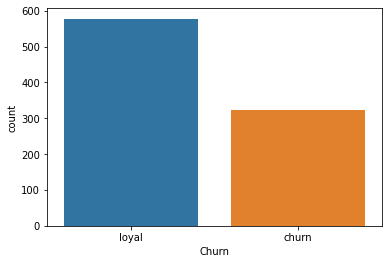

In [ ]:
sns.countplot(x="Churn", data=churn);


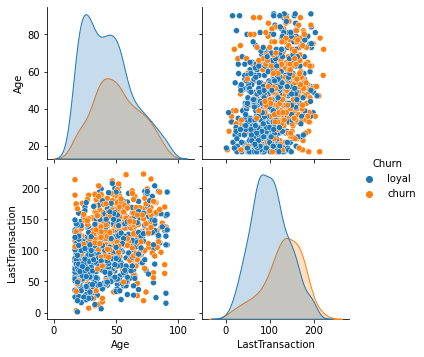

In [ ]:
sns.pairplot(churn, hue="Churn")

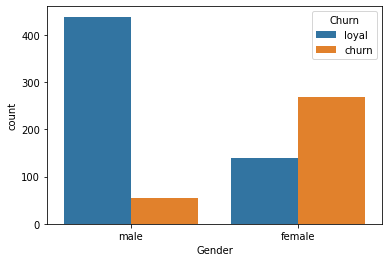

In [ ]:
sns.countplot(x="Gender", hue="Churn", data=churn);


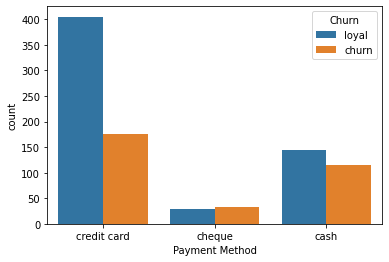

In [ ]:
sns.countplot(x="Payment Method", hue="Churn", data=churn);

### 3.2) to do data encoder

In [ ]:
lb_make = LabelEncoder()

In [ ]:
churn["Gender Code"] = lb_make.fit_transform(churn["Gender"])

In [ ]:
churn

Gender  Age Payment Method  LastTransaction  Churn  Gender Code
0      male   64    credit card               98  loyal            1
1      male   35         cheque              118  churn            1
2    female   25    credit card              107  loyal            0
4      male   39    credit card               90  loyal            1
5    female   28         cheque              189  churn            0
..      ...  ...            ...              ...    ...          ...
990    male   19    credit card               92  loyal            1
991  female   29    credit card               33  loyal            0
992    male   84    credit card              124  loyal            1
994    male   19    credit card               49  loyal            1
995  female   24    credit card               25  loyal            0

[900 rows x 6 columns]

### 3.3) to do one-hot encoding

In [ ]:
churn = pd.get_dummies(churn, columns=["Payment Method"])

In [ ]:
churn

Gender  Age  LastTransaction  Churn  Gender Code  Payment Method_cash  \
0      male   64               98  loyal            1                    0   
1      male   35              118  churn            1                    0   
2    female   25              107  loyal            0                    0   
4      male   39               90  loyal            1                    0   
5    female   28              189  churn            0                    0   
..      ...  ...              ...    ...          ...                  ...   
990    male   19               92  loyal            1                    0   
991  female   29               33  loyal            0                    0   
992    male   84              124  loyal            1                    0   
994    male   19               49  loyal            1                    0   
995  female   24               25  loyal            0                    0   

     Payment Method_cheque  Payment Method_credit card  
0                        0                           1  
1                        1                           0  
2                        0                           1  
4                        0                           1  
5                        1                           0  
..                     ...                         ...  
990                      0                           1  
991                      0                           1  
992                      0                           1  
994                      0                           1  
995                      0                           1  

[900 rows x 8 columns]



---



## 4) To do **`Logistic Regression`**

### 4.1) To select data

In [ ]:
X = churn[["Age", "LastTransaction", "Gender Code", "Payment Method_cash", "Payment Method_cheque", "Payment Method_credit card"]]
#X = churn[["Age", "LastTransaction"]]
y = churn["Churn"]

In [ ]:
X

Age  LastTransaction  Gender Code  Payment Method_cash  \
0     64               98            1                    0   
1     35              118            1                    0   
2     25              107            0                    0   
4     39               90            1                    0   
5     28              189            0                    0   
..   ...              ...          ...                  ...   
990   19               92            1                    0   
991   29               33            0                    0   
992   84              124            1                    0   
994   19               49            1                    0   
995   24               25            0                    0   

     Payment Method_cheque  Payment Method_credit card  
0                        0                           1  
1                        1                           0  
2                        0                           1  
4                        0                           1  
5                        1                           0  
..                     ...                         ...  
990                      0                           1  
991                      0                           1  
992                      0                           1  
994                      0                           1  
995                      0                           1  

[900 rows x 6 columns]

In [ ]:
y

0      loyal
1      churn
2      loyal
4      loyal
5      churn
       ...  
990    loyal
991    loyal
992    loyal
994    loyal
995    loyal
Name: Churn, Length: 900, dtype: object

### 4.2) to split train and test datasets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

### 4.3) to train and create a linear regression model

In [ ]:
clf = LogisticRegression()

In [ ]:
clf.fit(X_train,y_train)

LogisticRegression()

In [ ]:
clf.coef_

array([[-0.02332472, -0.00775513,  2.76546142, -0.24696719, -0.32714535,
         0.57098283]])

In [ ]:
clf.intercept_

array([1.08269557])

### 4.4) To predict from the test set

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
y_pred

array(['loyal', 'loyal', 'churn', 'loyal', 'churn', 'churn', 'churn',
       'loyal', 'loyal', 'loyal', 'loyal', 'loyal', 'loyal', 'churn',
       'churn', 'loyal', 'loyal', 'churn', 'loyal', 'churn', 'loyal',
       'loyal', 'loyal', 'churn', 'churn', 'loyal', 'churn', 'churn',
       'loyal', 'loyal', 'churn', 'churn', 'churn', 'churn', 'loyal',
       'churn', 'churn', 'loyal', 'churn', 'loyal', 'churn', 'loyal',
       'loyal', 'churn', 'loyal', 'loyal', 'churn', 'loyal', 'loyal',
       'churn', 'loyal', 'loyal', 'churn', 'churn', 'loyal', 'loyal',
       'churn', 'loyal', 'loyal', 'loyal', 'churn', 'churn', 'churn',
       'loyal', 'loyal', 'churn', 'loyal', 'churn', 'churn', 'loyal',
       'loyal', 'loyal', 'loyal', 'churn', 'churn', 'loyal', 'loyal',
       'loyal', 'churn', 'loyal', 'loyal', 'loyal', 'loyal', 'loyal',
       'loyal', 'loyal', 'loyal', 'churn', 'churn', 'loyal', 'loyal',
       'churn', 'loyal', 'loyal', 'loyal', 'loyal', 'loyal', 'loyal',
       'loyal', 'chu

### 4.5) To evaluate the predicted value with the test set

In [ ]:
cm_labels = churn["Churn"].unique()
print(cm_labels)
confusion_matrix(y_test, y_pred, labels=cm_labels)

['loyal' 'churn']


array([[154,  17],
       [ 23,  76]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       churn       0.82      0.77      0.79        99
       loyal       0.87      0.90      0.89       171

    accuracy                           0.85       270
   macro avg       0.84      0.83      0.84       270
weighted avg       0.85      0.85      0.85       270



In [ ]:
f1 = f1_score(y_test, y_pred, average='weighted')
print ("F1 =", f1)

F1 = 0.8508141762452107




---



## 5) To do **Decision Tree**

In [ ]:
# Import required libraries
from sklearn import tree

# Select Data
X = churn[["Age", "LastTransaction", "Gender Code", "Payment Method_cash", "Payment Method_cheque", "Payment Method_credit card"]]
y = churn["Churn"]

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# Train and Create a Model
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Print Confusion Matrix
print("***** Confusion Matrix *****")
cm_labels = churn["Churn"].unique()
print(cm_labels)
print(confusion_matrix(y_test, y_pred, labels=cm_labels))

# Print Report
print()
print("***** Report *****")
print(classification_report(y_test,y_pred))

# Check F1 value
print()
print("***** F1 *****")
f1 = f1_score(y_test, y_pred, average='weighted')
print ("F1 = ", f1)

***** Confusion Matrix *****
['loyal' 'churn']
[[143  28]
 [ 34  65]]

***** Report *****
              precision    recall  f1-score   support

       churn       0.70      0.66      0.68        99
       loyal       0.81      0.84      0.82       171

    accuracy                           0.77       270
   macro avg       0.75      0.75      0.75       270
weighted avg       0.77      0.77      0.77       270


***** F1 *****
F1 =  0.7687619731800767


## Exercises


1.   work with 5-fold cross-validation  (hint: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html)
2.   use other classifier techiques e.g. Bayes, SVN, ANN,


### do your exerciese here

In [ ]:
# run your code here

> <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.



---